In [1]:
!pip install ucimlrepo

In [2]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [4]:
X.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


In [27]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [9]:
y_processes=y['y'].map(
    {
        "yes":1,
        "no":0
    }
)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [10]:
numeric_columns=['age','balance','day_of_week','duration','campaign','pdays','previous']

categorical_columns=['job','marital','education','default','housing','loan','contact','month','poutcome']

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

numerical_transformer = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy='mean')),
        ("scaler",StandardScaler())
    ]
)

categorical_transformer = Pipeline(
    steps=[
        # Because 80% data is missing so create a new category for it
        ("imputer",SimpleImputer(strategy="constant" , fill_value="missing")),
        ("onehot",OneHotEncoder(handle_unknown="ignore",sparse_output=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
      ("num",numerical_transformer,numeric_columns),
      ("cat",categorical_transformer,categorical_columns)
    ]
)

Logistic_model_pipeline = Pipeline(
    steps=[
        ("preprocessing",preprocessor),
        ("logistic",LogisticRegression())
    ]
)

Random_forest_model_pipeline = Pipeline(
    steps=[
        ("preprocessing",preprocessor),
        ("random_forest",RandomForestClassifier())
    ]
)



In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y_processes,test_size=0.2,random_state=42,stratify=y_processes)

Logistic_model_pipeline.fit(X_train,y_train)
Random_forest_model_pipeline.fit(X_train,y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'balance',
                                                   'day_of_week', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome'])])),
                ('random_forest', RandomForestClassifier())])

In [20]:
y_predict_logistic = Logistic_model_pipeline.predict(X_test)
y_predict_random_forest = Random_forest_model_pipeline.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,RocCurveDisplay,classification_report

In [24]:
y_proba_predict_logistic = Logistic_model_pipeline.predict_proba(X_test)[:,1]
y_proba_predict_random_forest = Random_forest_model_pipeline.predict_proba(X_test)[:,1]

In [25]:
print("--- Model 1: Logistic Regression Report ---")
print(classification_report(y_test,y_predict_logistic, target_names=['No (0)', 'Yes (1)']))

--- Model 1: Logistic Regression Report ---
              precision    recall  f1-score   support

      No (0)       0.92      0.97      0.95      7985
     Yes (1)       0.64      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [26]:
print("--- Model 2: Random forest Report ---")
print(classification_report(y_test,y_predict_random_forest,target_names=['No (0)','Yes (1)']))

--- Model 2: Random forest Report ---
              precision    recall  f1-score   support

      No (0)       0.92      0.97      0.95      7985
     Yes (1)       0.67      0.40      0.50      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.91      0.90      9043



In [28]:
# Optional


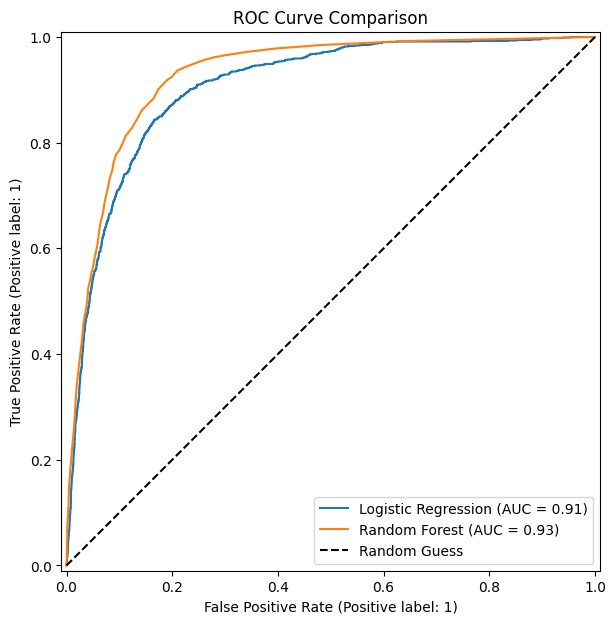


Model 1 (Logistic Regression) AUC Score: 0.9056
Model 2 (Random Forest) AUC Score: 0.9271


In [30]:
# --- 5. Plot the ROC Curve ---

import matplotlib.pyplot as plt


# Create a single plot to compare both models
plt.figure(figsize=(10, 7))
ax = plt.gca() # gets the current axis

# Plot for Model 1 (Logistic Regression)
RocCurveDisplay.from_estimator(Logistic_model_pipeline, X_test, y_test, name='Logistic Regression', ax=ax)

# Plot for Model 2 (Random Forest)
RocCurveDisplay.from_estimator(Random_forest_model_pipeline, X_test, y_test, name='Random Forest', ax=ax)

# Add the 'random guess' line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# --- 6. Get the AUC Score (The single number summary) ---
auc_lr = roc_auc_score(y_test, y_proba_predict_logistic)
auc_rf = roc_auc_score(y_test, y_proba_predict_random_forest)

print(f"\nModel 1 (Logistic Regression) AUC Score: {auc_lr:.4f}")
print(f"Model 2 (Random Forest) AUC Score: {auc_rf:.4f}")


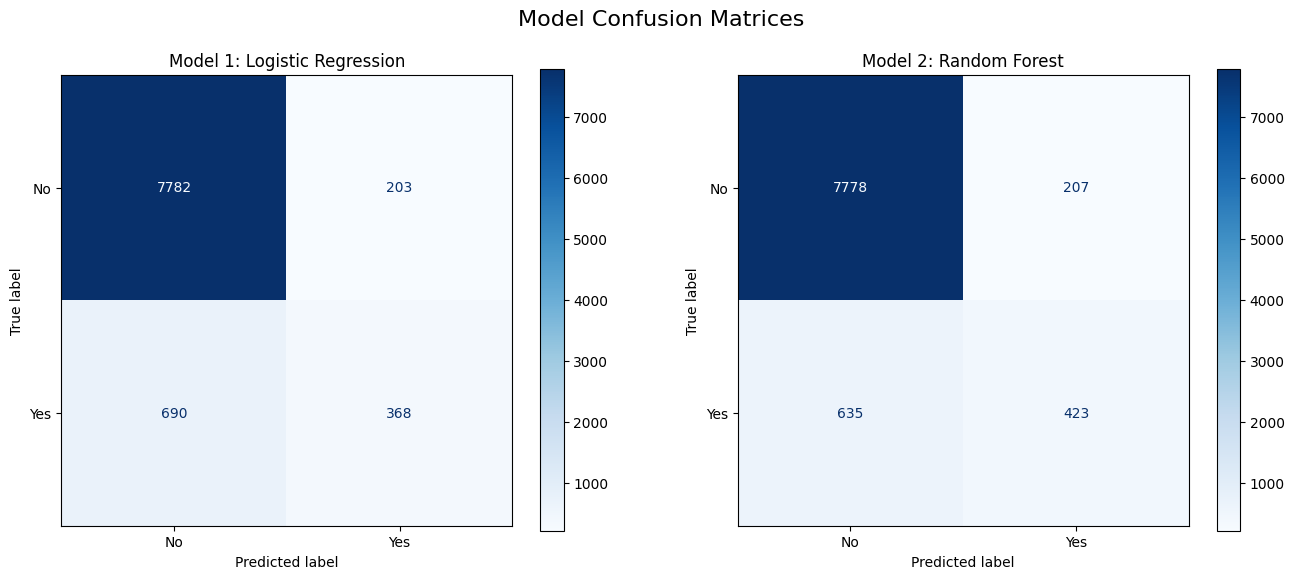

In [31]:
# --- 4. Plot Confusion Matrices ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Model Confusion Matrices', fontsize=16)

# Plot for Model 1 (Logistic Regression)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_logistic,
                                        display_labels=['No', 'Yes'],
                                        cmap='Blues',
                                        ax=ax1)
ax1.set_title('Model 1: Logistic Regression')

# Plot for Model 2 (Random Forest)
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_random_forest,
                                        display_labels=['No', 'Yes'],
                                        cmap='Blues',
                                        ax=ax2)
ax2.set_title('Model 2: Random Forest')

plt.show()